<a href="https://colab.research.google.com/github/variableVG/CV_project/blob/master/03_Resize_pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we are going to resize all the images to have them in a size that is manageable for our RAM. In addition, all images will have a homogeneous size, this can be beneficial during algorithm training.

# Import Data and images

In [16]:
import os.path

path_to_pictures = '../pics/orginal_pics/'
path_to_dataset = '../datasets/dataset_faces.csv'

In [ ]:
# Get pictures from Google Drive
#! pip install gdown
#! mkdir -p /content/pic/
#! gdown -O /content/pic/all_pictures.tar "1B2TxGvEP-tEhtgCu2-nccUqr4Tzit0e5"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1B2TxGvEP-tEhtgCu2-nccUqr4Tzit0e5
To: /content/pic/all_pictures.tar
100% 1.45G/1.45G [00:13<00:00, 111MB/s]


In [ ]:
# Extract pictures (in case of using in google Collabs)
#import tarfile
#try:
  #tar = tarfile.open('/content/pic/all_pictures.tar')
  #tar.extractall(path='/content/pic')
  #tar.close()
#except:
  #print("Pictures could not be extracted")

In [ ]:
#! mv /content/pic/content/drive/MyDrive/pic/* /content/pic/
#! rmdir /content/pic/content

rmdir: failed to remove '/content/pic/content': Directory not empty


In [17]:
import pandas as pd
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [18]:
df = pd.read_csv(path_to_dataset)

In [19]:
df.head()

,filename,age,gender,ethnicity
0,100_0_0_20170112213500903.jpg,61,0,0.0
1,100_0_0_20170112215240346.jpg,61,0,0.0
2,100_1_0_20170110183726390.jpg,61,1,0.0
3,100_1_0_20170112213001988.jpg,61,1,0.0
4,100_1_0_20170112213303693.jpg,61,1,0.0


In [20]:
df.shape

(24106, 4)

# Reduce dataset

Here I have reduced the number of samples, since my computer crashed continuously (also in google collabs I ran out of RAM). To do that, I have narrowed down the number of pictures based on the people's ethnicity and age. According to the statistical analysis in notebook number 2, most people are white and are either 0 or 1 years old or in their late twenties. Therefore, to avoid RAM overload and a very imbalanced database, we have decided to eliminate the data based on those characteristics that are more abundant in the dataset.

In [ ]:
# I can just load up to 8890 pictures before my RAM crashes
# Therefore I drop about 12.000 pictures of people with ethnicity number 1 and/or
# people with less than 1 year, since the df is imbalanced with a lot of babys
# and white people. 

df = df.drop(df[df['age'] == 22].sample(frac=.3).index) #Select randomly 30% of the samples where age is 22 and drop them
df = df.drop(df[df['age'] == 23].sample(frac=.4).index) #Select randomly 40% of the samples where age is 23 and drop them
df = df.drop(df[df['age'] == 24].sample(frac=.6).index)
df = df.drop(df[df['age'] == 25].sample(frac=.6).index)
df = df.drop(df[df['age'] == 26].sample(frac=.90).index)
df = df.drop(df[df['age'] == 27].sample(frac=.6).index)
df = df.drop(df[df['age'] == 28].sample(frac=.7).index)
df = df.drop(df[df['age'] == 29].sample(frac=.5).index)
df = df.drop(df[df['age'] == 30].sample(frac=.5).index)
df = df.drop(df[df['age'] == 32].sample(frac=.5).index)
df = df.drop(df[df['age'] == 35].sample(frac=.7).index)
df = df.drop(df[df['age'] == 36].sample(frac=.3).index)
df = df.drop(df[df['age'] == 40].sample(frac=.3).index)
df = df.drop(df[df['age'] == 45].sample(frac=.3).index)
df = df.drop(df[df['age'] <= 1].sample(frac=.85).index)
df = df.drop(df[df['age'] == 2].sample(frac=.45).index)
df = df.drop(df[df['ethnicity'] == 0].sample(frac=.5).index) # Selct 50% of the samples where ethnicity is 0 and drop them. 

df = df.drop(df.sample(frac=.8).index) # Randomly drop 90% of the samples in dataset

In [ ]:
df.shape

(2501, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


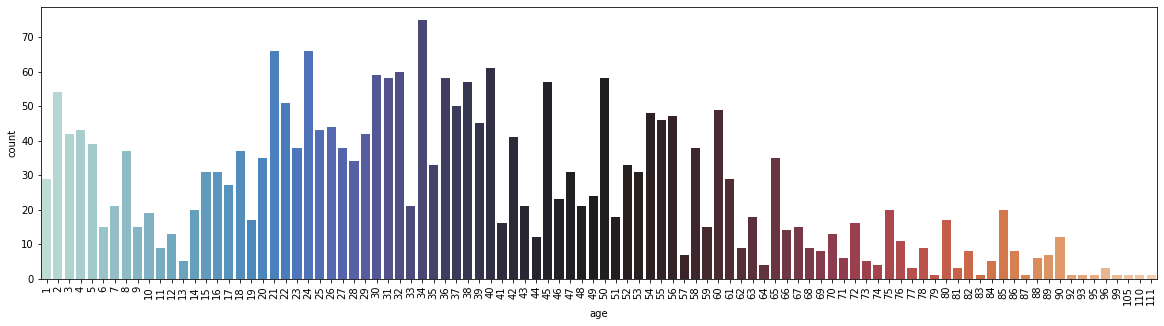

In [ ]:
# Check age distribution after some deleting data
import seaborn as sns
plt.figure(figsize=(20,5))
ax = sns.countplot(df['age'], palette='icefire')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


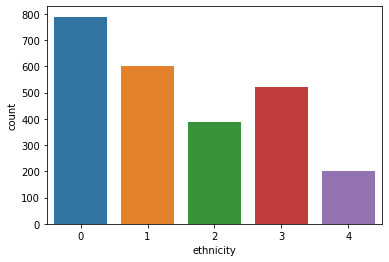

In [ ]:
# Check ethnicity distribution after deleting some data
sns.countplot(df['ethnicity'])

# Load Pictures

In [6]:
# WARNING: This might take long
from tqdm import tqdm
from pathlib import Path
images = []

for idx, image in enumerate(tqdm(df['filename'][0:10])):
  path = path_to_pictures + image
  try: 
    img = Image.open(path).convert('RGB') # I use that to make sure all the pictures are RGB
    images.append(img)
    #img = np.array(img)
  except FileNotFoundError as e:
    df = df.drop(idx)
    print(e)
  

100%|██████████| 10/10 [00:00<00:00, 25.07it/s]


In [7]:
df.shape

(24106, 4)

In [8]:
print(images[0])

<PIL.Image.Image image mode=RGB size=1002x1333 at 0x1DE35974730>


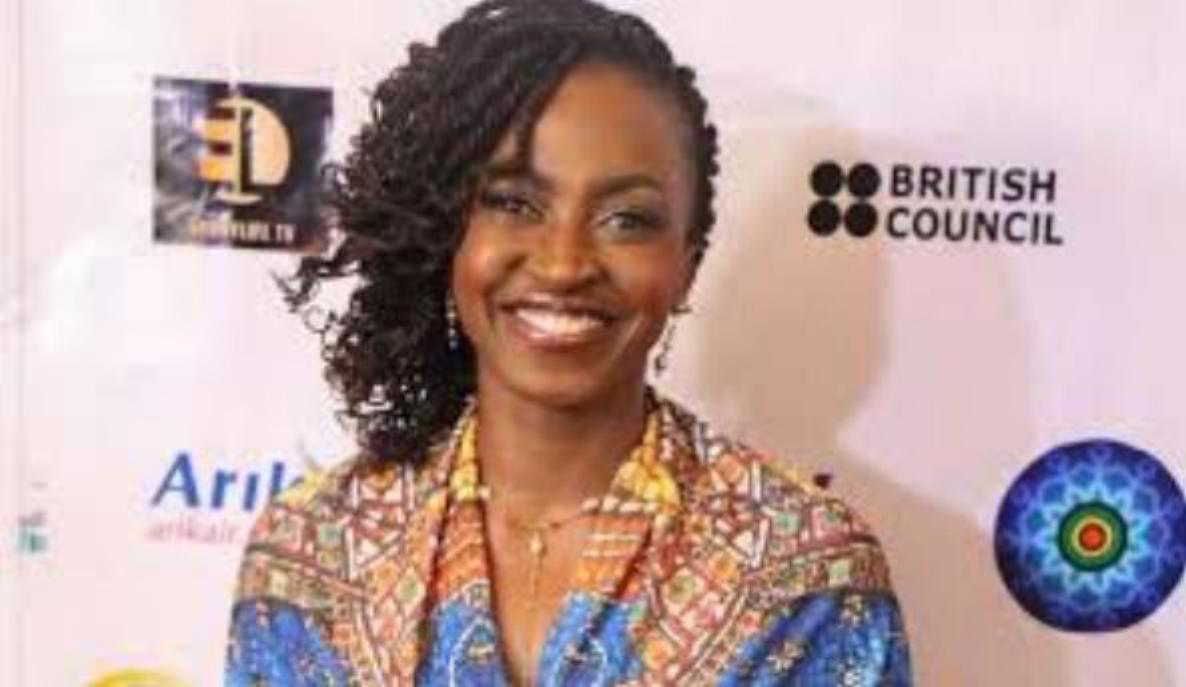

In [ ]:
images[0]

# Resize Pictures



### Investigate optimal picture size

In [9]:
# Investigate size of the first 5 pictures:
pixels_in_x_axis = []
pixels_in_y_axis = []

for idx, img in enumerate(images):
  img_array = np.array(img)
  pixels_in_x_axis.append(img_array.shape[0])
  pixels_in_y_axis.append(img_array.shape[1])
  if idx < 5: 
    print(f"Image {idx} has shape {img_array.shape}")

Image 0 has shape (1333, 1002, 3)
Image 1 has shape (1333, 1002, 3)
Image 2 has shape (470, 450, 3)
Image 3 has shape (1333, 1002, 3)
Image 4 has shape (1333, 1002, 3)


In [10]:
# Get average pixel size for axes x and y. 
pixels_in_x_axis = pd.Series(pixels_in_x_axis)
pixels_in_y_axis = pd.Series(pixels_in_y_axis)

print(f"Mean size for pictures is ({pixels_in_x_axis.mean()} , {pixels_in_y_axis.mean()})")
print(f"Smaller size for x is {pixels_in_x_axis.min()} pixel and for y {pixels_in_y_axis.min()} pixels.")

Mean size for pictures is (937.0 , 771.4)
Smaller size for x is 441 pixel and for y 332 pixels.


### Set image size

In [11]:
img_size = (128, 128)

### Resize images

https://pytorch.org/vision/main/generated/torchvision.transforms.Resize.html

In [21]:
# Load the images and resize them using Resize()
resizer = T.Resize(size=img_size)
path_to_small_pic = '../pics/small_pics/'
for idx, imageName in enumerate(tqdm(df['filename'])):
  path = path_to_pictures + imageName
  image_name = path_to_small_pic + imageName
  if os.path.exists(image_name):
    continue
  try:
    image = Image.open(path).convert('RGB') # I use that to make sure all the pictures are RGB
    resized_img =  resizer(image)
    resized_img.save(image_name)
    image.close()
  except (FileNotFoundError, ValueError) as e:
    df = df.drop(idx)
    print(e)

 79%|███████▉  | 19102/24106 [00:03<00:00, 7482.01it/s]

unknown file extension: 


100%|██████████| 24106/24106 [02:09<00:00, 186.28it/s] 


# Upload tar file

In [ ]:
df.shape

(2501, 4)

In [23]:
# Save all pictures in a .tar file and upload it to GoogleDrive
import tarfile
path = '../pics/small_pictures.tar'
tar = tarfile.open(path, "w")

from tqdm import tqdm
for idx, name in  enumerate(tqdm(df['filename'])):
  path = path_to_small_pic + name
  try: 
    tar.add(path, arcname=name)
  except:
    print(f"file {name} not found")
    df = df.drop(idx)
tar.close()

100%|██████████| 24105/24105 [02:13<00:00, 180.04it/s]


In [22]:
df.shape

(24105, 4)

In [24]:
# Upload reduced dataset
df.to_csv('../datasets/dataset_faces_resized.csv', index=False)